In [1]:
# irisデータのロード
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
X = iris.data
y = iris.target # クラスラベルは今回は未知とする

In [2]:
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.fit_transform(X)

In [3]:
# 主成分分析の実行
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_std)

In [4]:
# k-means法を実行
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,   # クラスタの個数を指定
            init='random',  # セントロイドの初期値の決め方を決定
            n_init=10,      # 異なるセントロイドの初期値を用いての実行回数
            max_iter=300,   # ひとつのセントロイドを用いたときの最大イテレーション回数
            tol=1e-04,      # 収束と判定するための相対的な許容誤差
            random_state=0, # セントロイドの初期化に用いる乱数生成器の状態
           )

# クラスラベルを予測
y_km = km.fit_predict(X_pca[:, 0:2])

In [5]:
# クラスタリングの結果を出力
import matplotlib.pyplot as plt
% matplotlib inline

# クラスタリングの結果をプロットする関数
# (クラスタの数, 学習器, 学習データ)
def kmeans_plot(n_clusters, km, X):
    # クラスタの予測値を算出
    y_km = km.fit_predict(X)
    
    # クラスタごとに散布図をプロット
    # 5クラスまでプロットできる
    for i, color, marker in zip(range(n_clusters), 'rgbcm', '>o+xv'):
        plt.scatter(X[y_km==i, 0],            # 横軸の値
                    X[y_km==i, 1],            # 縦軸の値
                    color=color,              # プロットの色
                    marker=marker,            # プロットの形
                    label='cluster ' + str(i) # ラベル
                   )
    
    # クラスタの中心をプロット
    plt.scatter(km.cluster_centers_[:, 0],    # 横軸の値
                km.cluster_centers_[:, 1],    # 縦軸の値
                color='y',                    # プロットの色
                marker='*',                   # プロットの形
                label='centroids',            # ラベル
                s=300,                        # プロットのサイズを大きくして見やすくする
               )
    
    plt.legend()
    plt.grid()
    plt.show()

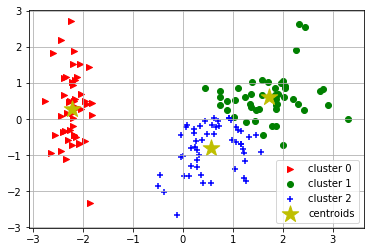

In [6]:
# プロットを実行
kmeans_plot(3, km, X_pca[:, 0:2])